# Modelos de Rgresión Lineal.
## Modelo con datos simulados.

* y = a + b * x

* x : 100 valores distribuidos según una N(1.5, 2.5)

* Ye= 5 + 1.9 * x + e

* e estará distribuido según una N(0, 0.8)

In [1328]:
import pandas as pd
import numpy as np

In [1329]:
x = 1.5 + 2.5 * np.random.randn(100)

In [1330]:
res = 0 + 0.8 * np.random.randn(100)

In [1331]:
y_pred = 5 + 1.9 * x

In [1332]:
y_act= 5 + 1.9 * x + res

In [1333]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [1334]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_pred": y_pred_list
    }
)

In [1335]:
data.head()

,x,y_actual,y_pred
0,5.652898,16.832256,15.740506
1,2.613360,9.413870,9.965384
2,1.211514,6.534980,7.301877
3,2.723159,10.184435,10.174002
4,7.019636,18.487852,18.337308


In [1336]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1337]:
y_mean= [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

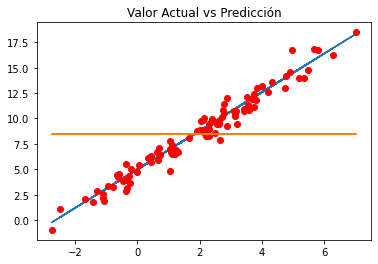

In [1338]:
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean)
plt.title("Valor Actual vs Predicción")

In [1339]:
data["SSR"]=(data["y_pred"] - np.mean(y_act))**2
data["SSD"]=(data["y_pred"] - data["y_actual"])**2
data["SST"]=(data["y_actual"] - np.mean(y_act))**2

In [1340]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,5.652898,16.832256,15.740506,52.816823,1.191918,69.877366
1,2.613360,9.413870,9.965384,2.227245,0.304168,0.885258
2,1.211514,6.534980,7.301877,1.371501,0.588131,3.755875
3,2.723159,10.184435,10.174002,2.893448,0.000109,2.929050
4,7.019636,18.487852,18.337308,97.304818,0.022663,100.297497


In [1341]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [1342]:
SSR

1516.6909685875828

In [1343]:
SSD

57.21566257941221

In [1344]:
SST

1572.000343183747

In [1345]:
R2 = SSR/SST
R2

0.9648159271491334

(array([ 1.,  1.,  4., 13., 22., 21., 22., 12.,  2.,  2.]),
 array([-2.30005215, -1.85137057, -1.40268899, -0.95400741, -0.50532583,
        -0.05664425,  0.39203732,  0.8407189 ,  1.28940048,  1.73808206,
         2.18676364]),
 <a list of 10 Patch objects>)

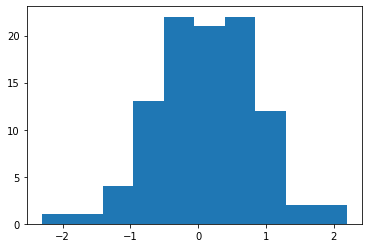

In [1346]:
plt.hist(data["y_pred"]-data["y_actual"])

## Obtención de la recta de regresión
* y= a + b * x
* b = sum((xi-x_m)*(y_i-y_m))/sum((xi-x_m)**2)
* a = y_m - b * x_m

In [1347]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.8975150213213974, 8.472987996372517)

In [1348]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [1349]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [1350]:
alpha = y_mean - beta * x_mean

In [1351]:
beta, alpha

(1.900999495200848, 4.8658128987045135)

El modelo lineal obtenido por regresión es :
y = 5.089288575506496 + 1.9050295021580557 * x 

In [1352]:
data["y_model"]= alpha + beta * data["x"]

In [1353]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,5.652898,16.832256,15.740506,52.816823,1.191918,69.877366,31.392254,14.102902,15.611969
1,2.613360,9.413870,9.965384,2.227245,0.304168,0.885258,0.673525,0.512434,9.833809
2,1.211514,6.534980,7.301877,1.371501,0.588131,3.755875,1.329475,0.470597,7.168901
3,2.723159,10.184435,10.174002,2.893448,0.000109,2.929050,1.413045,0.681688,10.042536
4,7.019636,18.487852,18.337308,97.304818,0.022663,100.297497,51.297344,26.236123,18.210137


In [1354]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [1355]:
SSR, SSD, SST

(1516.5351786388158, 55.46516454493195, 1572.000343183747)

In [1356]:
R2 = SSR/ SST

In [1357]:
R2

0.9647168241499244

Text(0.5, 1.0, 'Valor Actual vs Predicción')

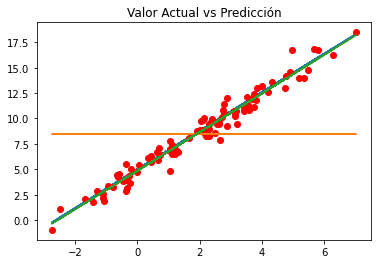

In [1358]:
y_mean= [np.mean(y_act) for i in range(1, len(x_list) + 1)]
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean)
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

(array([ 1.,  1.,  4., 13., 22., 21., 22., 12.,  2.,  2.]),
 array([-2.42928868, -1.98083663, -1.53238458, -1.08393253, -0.63548048,
        -0.18702843,  0.26142361,  0.70987566,  1.15832771,  1.60677976,
         2.05523181]),
 <a list of 10 Patch objects>)

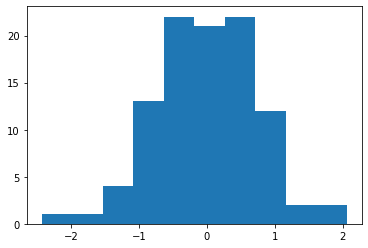

In [1359]:
plt.hist(data["y_model"]-data["y_actual"])

## Error estándar de los residuos (RSE)

In [1360]:
RSE= np.sqrt(SSD/(len(data)-2))

In [1361]:
RSE

0.7523104856274568

In [1363]:
np.mean(data["y_actual"])

8.472987996372517

In [1364]:
RSE / np.mean(data["y_actual"])

0.08878927787334745